In [ ]:
#Import Moduls

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [ ]:
# rice_gall_midge = 1, brown_plant_hopper = 0

In [ ]:
#Create Dataframe for Input and Output

In [5]:
input_path = []
label = []

for class_name in os.listdir('../artifacts/PestsImages'):
  for path in os.listdir("../artifacts/PestsImages/"+class_name):
    if class_name == 'rice_gall_midge':
      label.append(1)
    if class_name == 'brown_plant_hopper':
      label.append(0)
    input_path.append(os.path.join("PestsImages", class_name, path))

In [ ]:
#print(input_path[0], label[0])
#len(label)
#len(input_path)

In [6]:
len(input_path)

1582

In [7]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PestsImages\rice_gall_midge\5 (191).jpg,1
1,PestsImages\rice_gall_midge\5 (749).jpg,1
2,PestsImages\brown_plant_hopper\7 (45).jpg,0
3,PestsImages\brown_plant_hopper\7 (42).jpg,0
4,PestsImages\rice_gall_midge\5 (784).jpg,1


In [9]:
df['label'] = df['label'].astype('str')

In [ ]:
#Exploratory Data Analysis

In [8]:
#to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('rice_gall_midge')
  plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

In [9]:
#to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('brown_plant_hopper')
  plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

In [1]:
# pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='count', ylabel='label'>

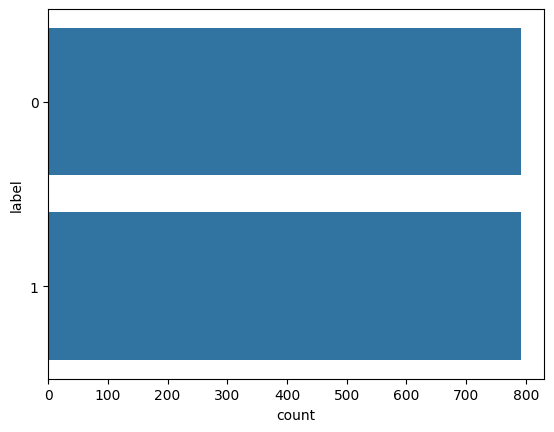

In [10]:
import seaborn as sns
sns.countplot(df['label'])

In [ ]:
#Create DataGenerator for the Images

In [11]:
df.tail()

,images,label
1577,PestsImages\brown_plant_hopper\7 (703).jpg,0
1578,PestsImages\rice_gall_midge\5 (114).jpg,1
1579,PestsImages\rice_gall_midge\5 (350).jpg,1
1580,PestsImages\rice_gall_midge\5 (490).jpg,1
1581,PestsImages\brown_plant_hopper\7 (670).jpg,0


In [63]:
# pip install scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 108.9 kB/s eta 0:01:25
   ---------------------------------------- 0.0/9.3 MB 108.9 kB/s eta 0:01:25
   ---------------------------------------- 0.0/9.3 MB 108.9 kB/s eta 0:01:25
   ---------------------------------------- 0.0/9.3 MB 108.9 kB/s eta 0:01:25
   ---------------------------------------- 0.0/9.3 MB 78.6 kB/s eta 0:01:58
   ---------------------------------------- 0.0/9.3 MB 78.6 kB/s eta 0:01:58
   ---------------------------------------- 0.0/9.3

In [12]:
#input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
train.head()

,images,label
1227,PestsImages\rice_gall_midge\5 (476).jpg,1
930,PestsImages\rice_gall_midge\5 (58).jpg,1
1521,PestsImages\rice_gall_midge\5 (75).jpg,1
236,PestsImages\brown_plant_hopper\7 (243).jpg,0
1343,PestsImages\brown_plant_hopper\7 (56).jpg,0


In [14]:
train.shape, test.shape

((1265, 2), (317, 2))

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255, #normalization of images
    rotation_range = 40, #augmentation of images to avoid overfitting
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_generator = ImageDataGenerator(rescale=1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


In [76]:
#Model Creation

In [16]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPool2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [20]:
history = model.fit(train_iterator, epochs=50, validation_data=val_iterator)

ValueError: Asked to retrieve element 0, but the Sequence has length 0